In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from astropy.constants import m_p, M_sun
import astropy.units as u
import matplotlib as mpl
import seaborn as sns
import astropy.units as u
from plotting_setup import *

sys.path.append('../pipeline_scripts/')
from pipeline_main_nosink import pipeline_nosink
from pipeline_2D_nosink import to_osyris_ivs
from pipeline_main import sink_positions, serialize_directory, sinks, true_sinks, pipeline

core_data = {}
initial_sn = [158, 222, 176, 212, 235, 341, 401, 403, 445]



first_sink_snap = [159, 223, 177, 213, 236, 342, 402, 404, 446]



In [5]:
plot_data = serialize_directory(filename = 'fmr05_accretion_spheres.pkl', store = False)

In [8]:
plot_data[6].keys()

dict_keys([50, 200, 400, 700, 1000, 10000, 'M_dot', 'M_star', 'sink_time', 'time', 't_ff'])

Final sink time 23.2 yr
Final sink time 0.23 M_sun
Final sink time 57.8 yr
Final sink time 0.59 M_sun
Final sink time 42.3 yr
Final sink time 0.40 M_sun
Final sink time 15.8 yr
Final sink time 0.17 M_sun
Final sink time 11.2 yr
Final sink time 0.19 M_sun
Final sink time 30.1 yr
Final sink time 0.32 M_sun
Final sink time 15.7 yr
Final sink time 0.10 M_sun
Final sink time 28.5 yr
Final sink time 0.26 M_sun
Final sink time 34.0 yr
Final sink time 0.29 M_sun


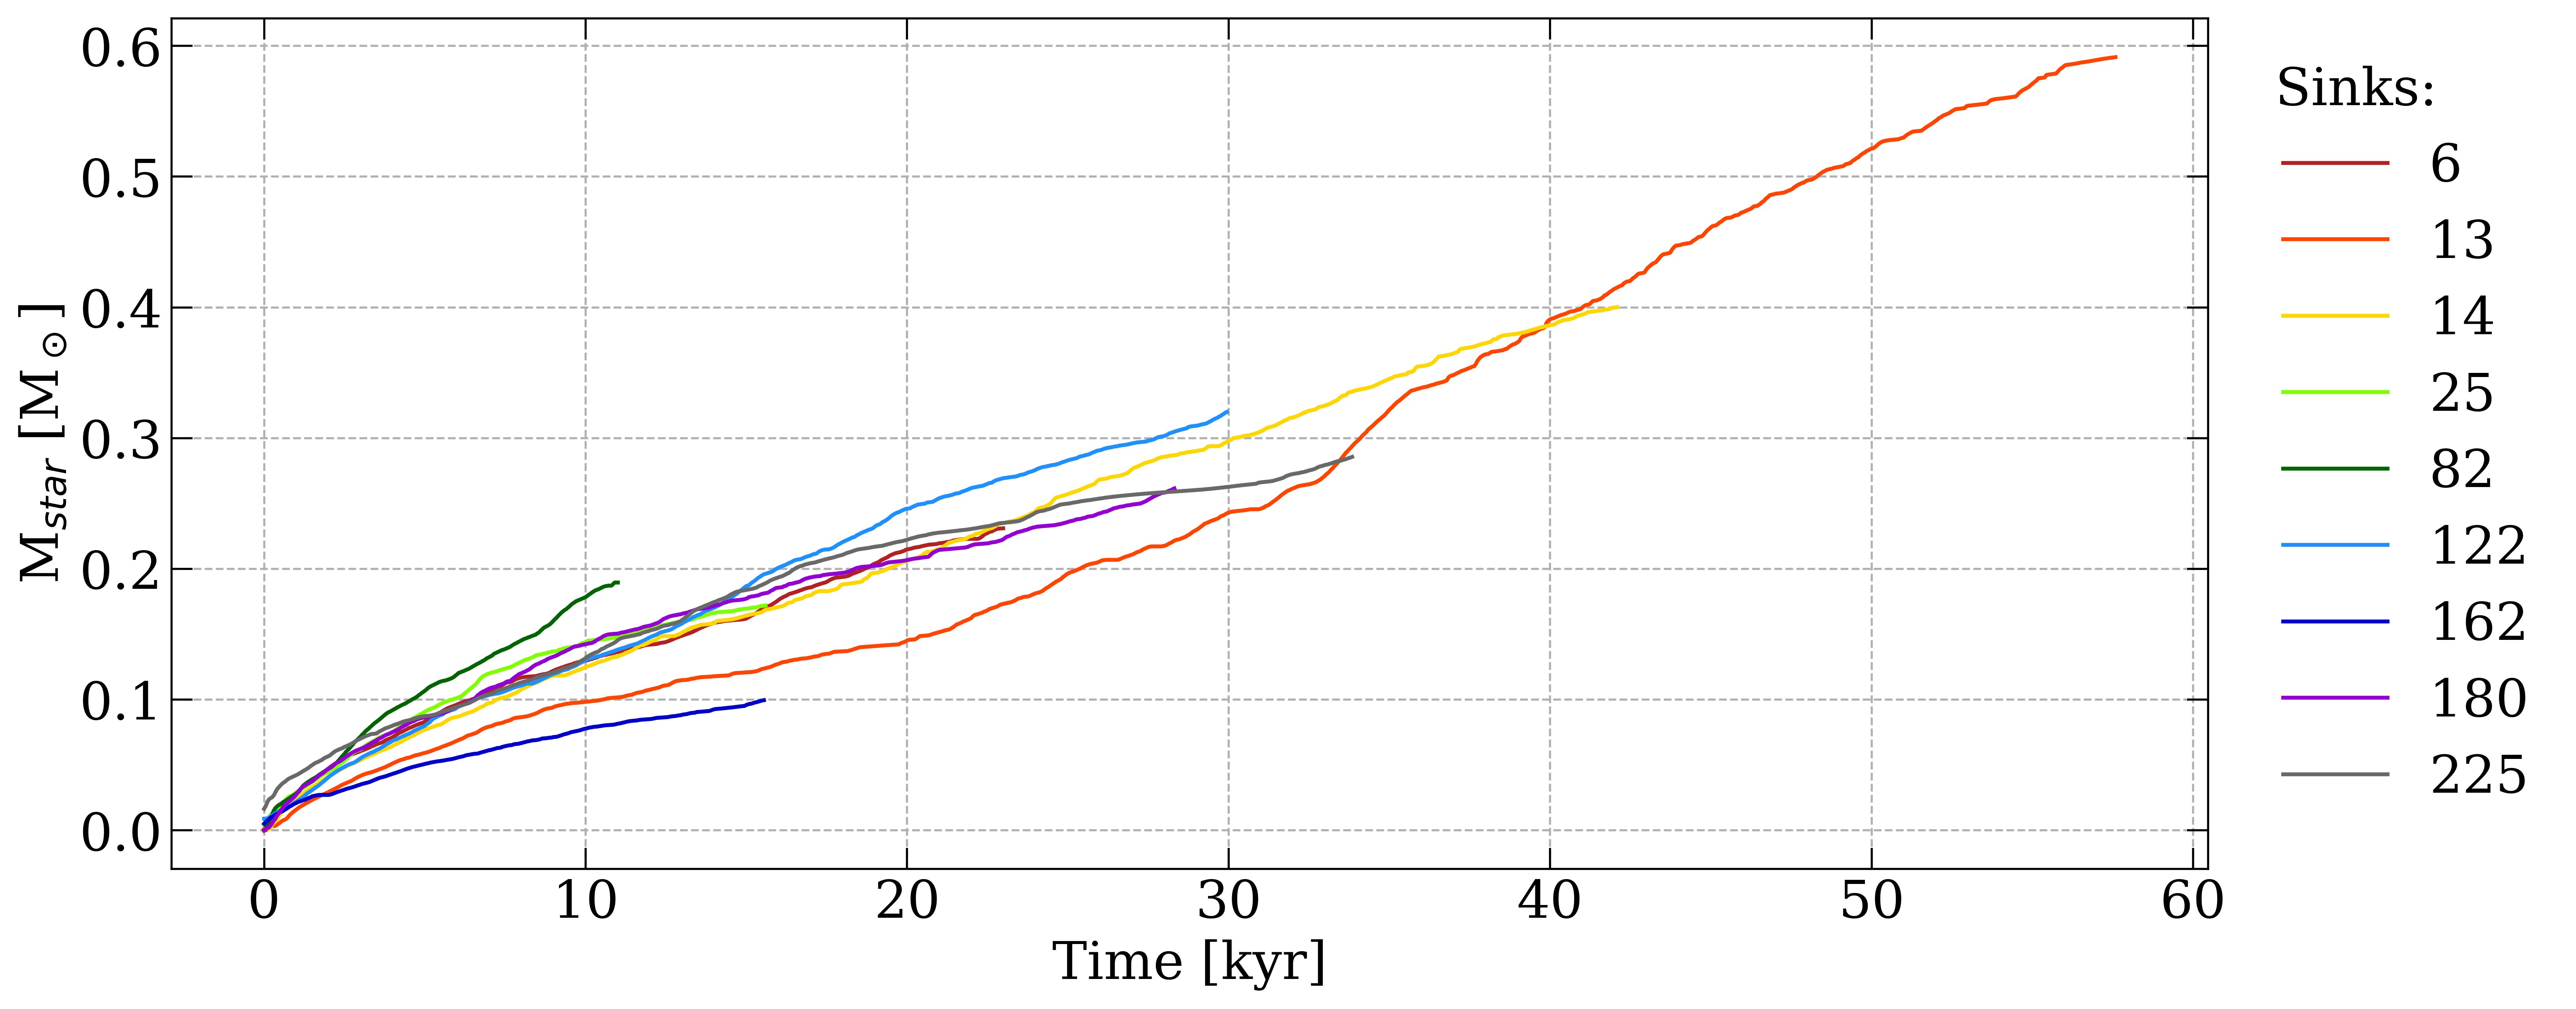

In [16]:


fig, axs = plt.subplots(figsize = (14,6), dpi = 500)
axs.grid(ls = '--')
axs.set(ylabel = 'M$_{star}$ [M$_\odot$]', xlabel = 'Time [kyr]')

for i, sink in enumerate(sinks):
    axs.plot((plot_data[sink]['sink_time'] - plot_data[sink]['sink_time'][0])*1e-3, plot_data[sink]['M_star'], '-', label = sink, color = sink_colors[i])
    print(f'Final sink time {(plot_data[sink]["sink_time"][-1] - plot_data[sink]["sink_time"][0] + 200)*1e-3:2.1f} yr')
    print(f'Final sink time {plot_data[sink]["M_star"][-1]:1.2f} M_sun')
plt.legend(frameon = False, bbox_to_anchor=(1.01, 1), loc="upper left", title = 'Sinks:      ')
#plt.savefig(save_folder + 'sink_masses', facecolor = 'w', bbox_inches='tight', dpi = 500)

In [88]:
plot_data[13]['sink_time'][-1] - plot_data[13]['sink_time'][0]

28542.37963744253

[]
[526, 534, 562]
[241, 248, 252, 347, 352]
[260, 266]
[]
[351]
[41]
[]
[364]


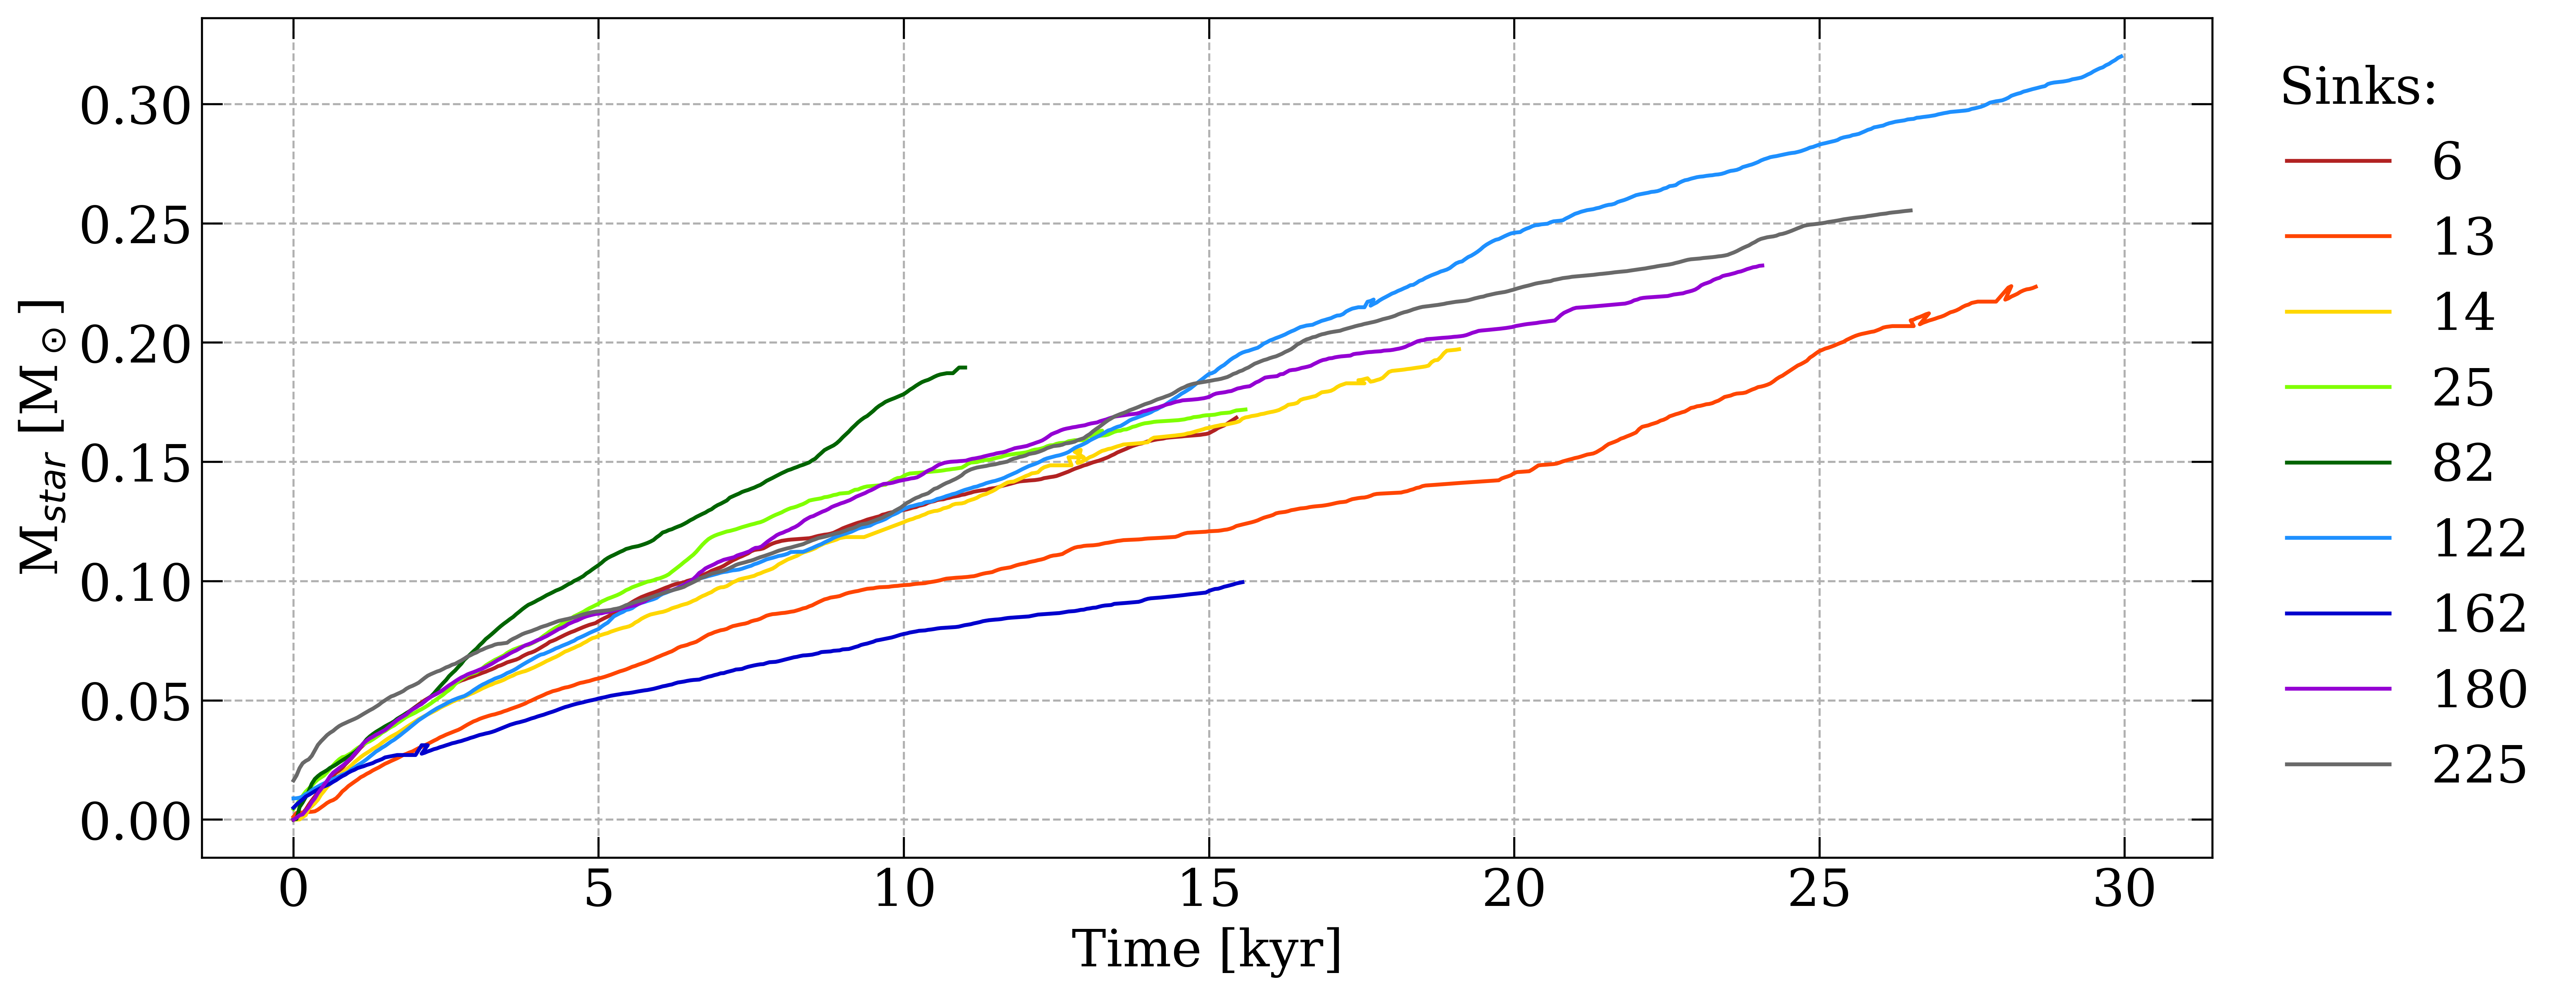

In [75]:
plot_data = serialize_directory(filename = 'fmr05_accretion_spheres.pkl', store = False)

fig, axs = plt.subplots(figsize = (14,6), dpi = 500)
axs.grid(ls = '--')
axs.set(ylabel = 'M$_{star}$ [M$_\odot$]', xlabel = 'Time [kyr]')

for j, sink in enumerate(sinks):
    index_to_remove = []
    for i in range(1, len(plot_data[sink]['sink_time'])):
        if plot_data[sink]['sink_time'][i] <  plot_data[sink]['sink_time'][i - 1] or plot_data[sink]['M_star'][i] <  plot_data[sink]['M_star'][i - 1]:
            index_to_remove.append(i)
    print(index_to_remove)
    #print(len(plot_data[sink]['sink_time']))
    if len(index_to_remove) == 0:
        new_t = plot_data[sink]['sink_time']; new_mass = plot_data[sink]['M_star']
    else:
        new_t = np.delete(plot_data[sink]['sink_time'], np.array(index_to_remove))
        new_mass = np.delete(plot_data[sink]['M_star'], np.array(index_to_remove))  
    axs.plot((new_t - new_t[0])*1e-3, new_mass, '-', label = sink, color = colors[j])
    #print(len(new_t))
plt.legend(frameon = False, bbox_to_anchor=(1.01, 1), loc="upper left", title = 'Sinks:      ')

#plt.savefig(save_folder + 'sink_masses', facecolor = 'w', bbox_inches='tight', dpi = 500)

15445.876196160913
None
28542.37963744253
None
19094.90196410194
None
15595.8361591734
None
11003.870691910386
None
29942.0059594661
None
15545.849504865706
None
24062.881498999894
None
26492.92680886388
None


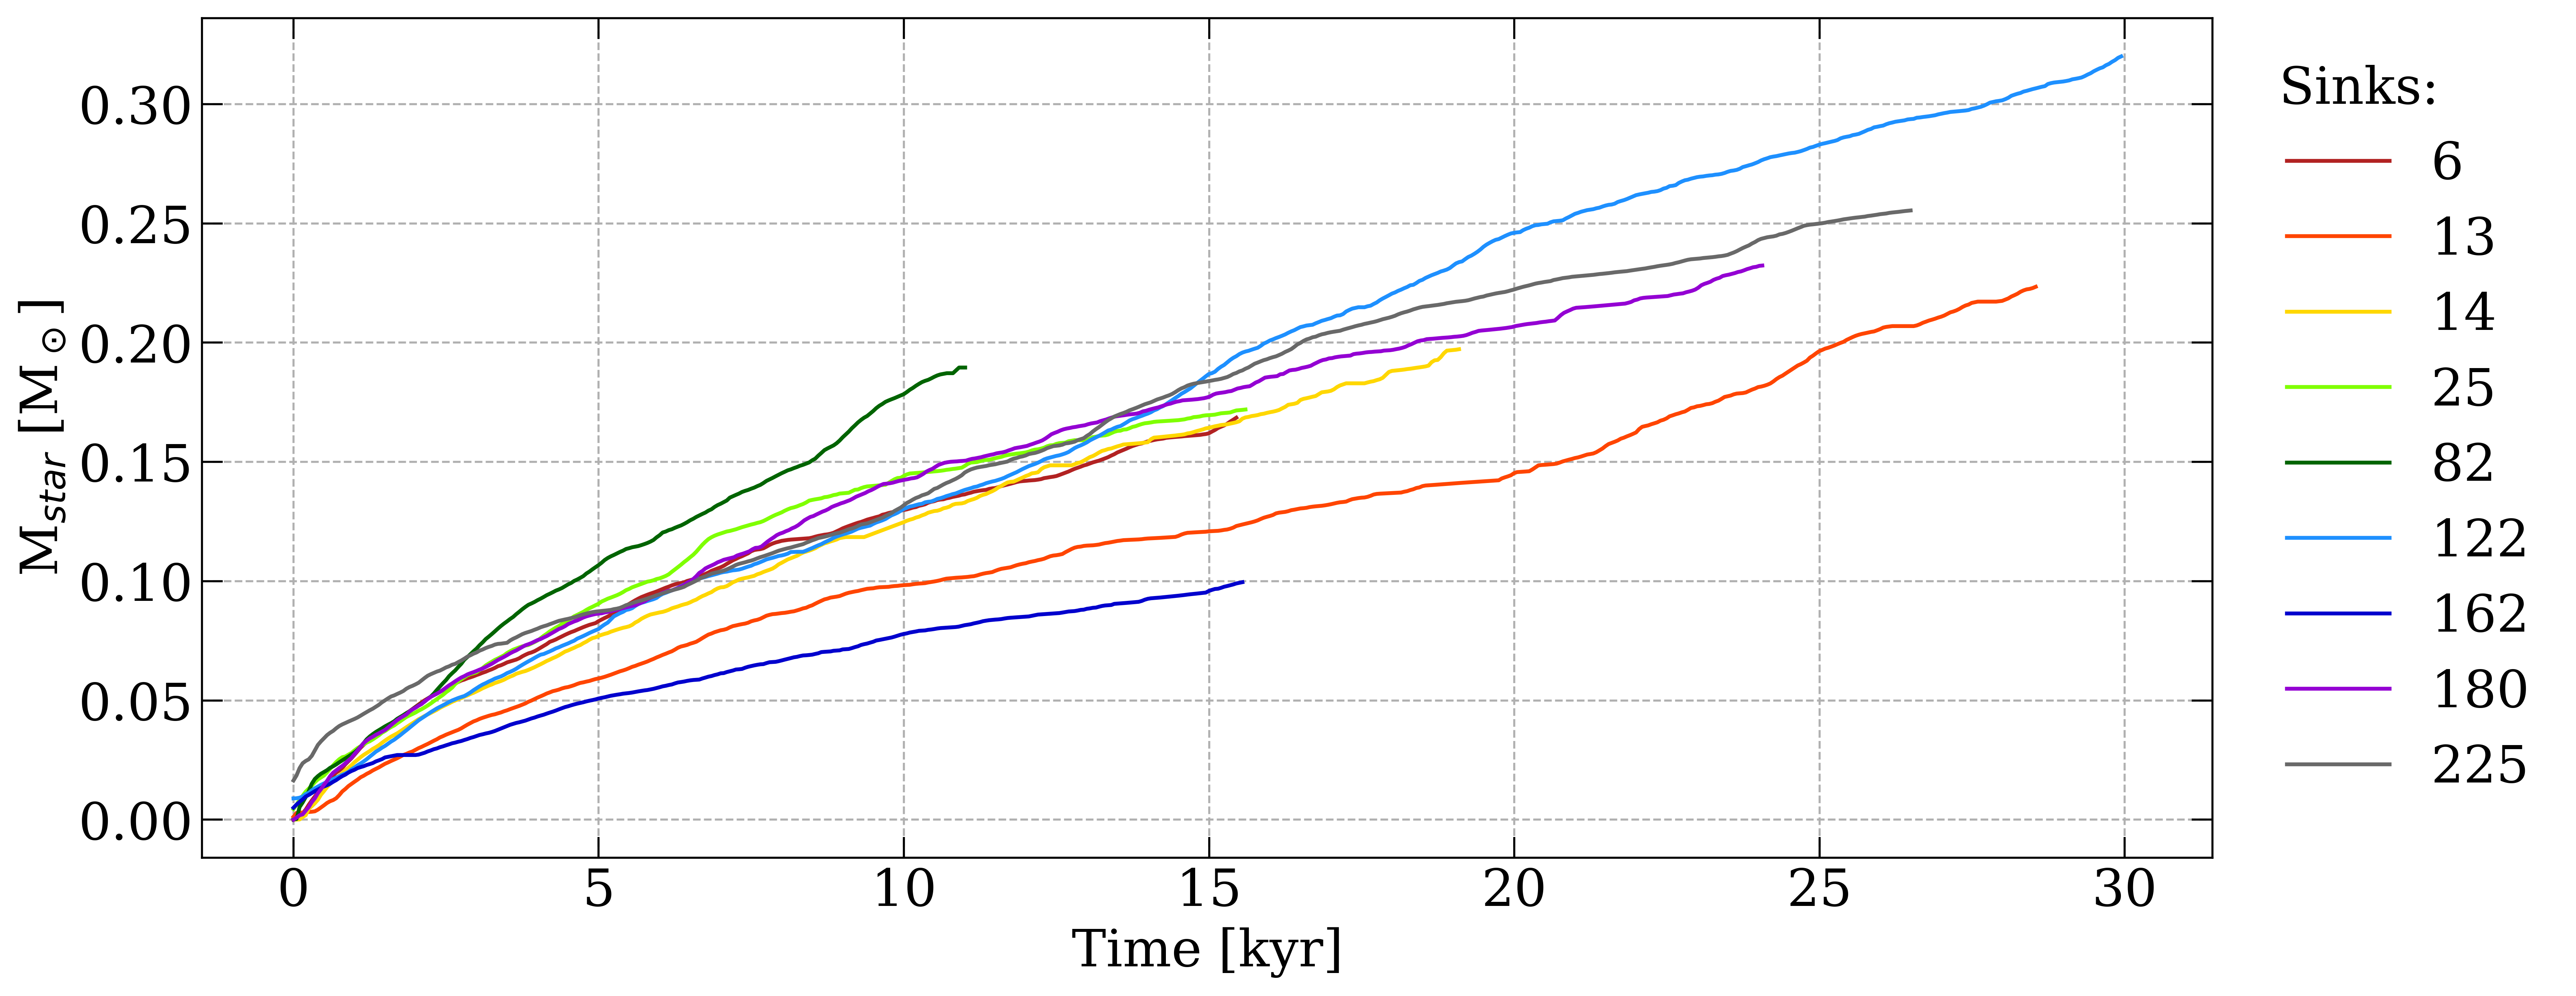

In [94]:
plot_data = serialize_directory(filename = 'fmr05_accretion_spheres.pkl', store = False)

fig, axs = plt.subplots(figsize = (14,6), dpi = 500)
axs.grid(ls = '--')
axs.set(ylabel = 'M$_{star}$ [M$_\odot$]', xlabel = 'Time [kyr]')

for j, sink in enumerate(sinks):
    t = plot_data[sink]['sink_time']
    m = plot_data[sink]['M_star']
    while True:
        index_to_remove = []
        for i in range(1, len(t)):
            if m[i] < m[i - 1]:
                index_to_remove.append(i - np.argmax([m[i], m[i - 1]]))
            elif t[i] < t[i - 1]:
                index_to_remove.append(i)

        if len(index_to_remove) == 0:
            break
        else:
            t =  np.delete(t, np.array(index_to_remove))
            m = np.delete(m, np.array(index_to_remove))  
    
    axs.plot((t - t[0])*1e-3, m, '-', label = sink, color = colors[j])
    print(print(t[-1] - t[0]))
plt.legend(frameon = False, bbox_to_anchor=(1.01, 1), loc="upper left", title = 'Sinks:      ')

#plt.savefig(save_folder + 'sink_masses', facecolor = 'w', bbox_inches='tight', dpi = 500)

In [47]:
index_to_remove

[]

In [28]:
type(new_mass), type(new_t), type(colors)

(numpy.ndarray, numpy.ndarray, list)

In [65]:
sink = 13
unique, index = np.unique(plot_data[sink]['sink_time'], return_index=True)

In [60]:
unique.shape, plot_data[sink]['sink_time'].shape

((574,), (574,))

In [66]:
index_to_remove = []
for i in range(1, len(plot_data[sink]['sink_time'])):
    if plot_data[sink]['sink_time'][i] <  plot_data[sink]['sink_time'][i - 1] or plot_data[sink]['M_star'][i] <  plot_data[sink]['M_star'][i - 1]:
        index_to_remove.append(i)

In [67]:
new_t = np.delete(plot_data[sink]['sink_time'], index_to_remove)
new_mass = np.delete(plot_data[sink]['M_star'], index_to_remove)

In [68]:
len(new_t)

571

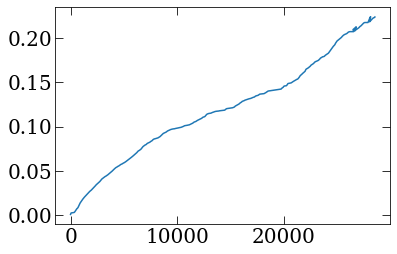

In [69]:
plt.plot(new_t - new_t[0], new_mass)

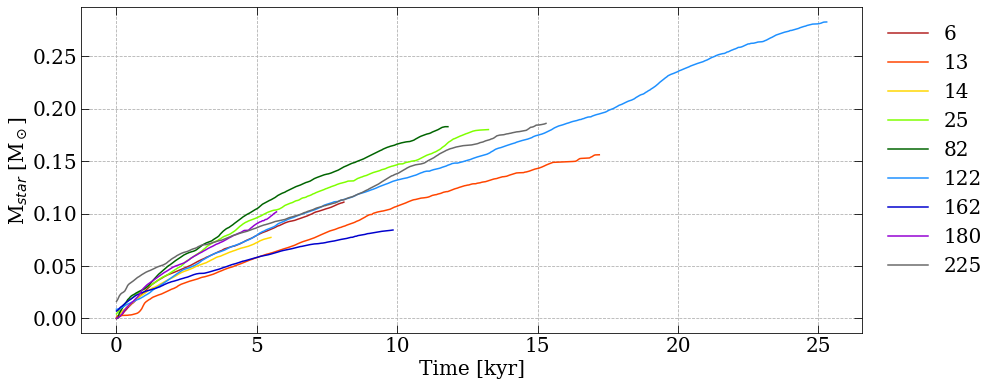

In [4]:
plot_data = serialize_directory(filename = 'fmr06_accretion_spheres.pkl', store = False)

fig, axs = plt.subplots(figsize = (14,6))
axs.grid(ls = '--')

axs.set(ylabel = 'M$_{star}$ [M$_\odot$]', xlabel = 'Time [kyr]')

for i, sink in enumerate(sinks):
    axs.plot((plot_data[sink]['sink_time'] - plot_data[sink]['sink_time'][0])*1e-3, plot_data[sink]['M_star'], '-', label = sink, color = colors[i])

plt.legend(frameon = False, bbox_to_anchor=(1.01, 1), loc="upper left")
plt.savefig(save_folder + 'sink_masses', facecolor = 'w', bbox_inches='tight', dpi = 500)